In [28]:
## standard preamble
import numpy as np
import scipy
import scipy.optimize as fitter
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("paper")

import matplotlib
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
matplotlib.rc('mathtext',**{'default':'regular'})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
from numpy import genfromtxt

def from_csv(filename):
    """Exports data from Pulse Height analyzer. Note only channel 0 is active."""
    
    col0 = genfromtxt(filename, delimiter=',', skip_header=1, usecols=(0))
    col1 = genfromtxt(filename, delimiter=',', skip_header=1, usecols=(1))
    col2 = genfromtxt(filename, delimiter=',', skip_header=1, usecols=(2))
    
    
    return col0, col1, col2

In [30]:
currents, rb85_freq, rb87_freq = from_csv("data.csv")

rb85_currents = currents
rb87_currents = currents[~np.isnan(rb87_freq)]
rb87_freq = rb87_freq[~np.isnan(rb87_freq)]

print(rb85_currents.shape, rb85_freq.shape)
print(rb87_currents.shape, rb87_freq.shape)
print(rb85_currents)
print(rb87_currents)

(24,) (24,)
(22,) (22,)
[-1.9 -1.7 -1.5 -1.3 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.3  0.3  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.3  1.5  1.7  1.9]
[-1.7 -1.5 -1.3 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.3  0.3  0.5  0.6
  0.7  0.8  0.9  1.   1.1  1.3  1.5  1.7]


In [31]:
def model(x, a, b):
    return a + b*x

def fit_linear(x, y):
    par, cov = fitter.curve_fit(model, x,y)
    errors = [np.sqrt(cov[0,0]), np.sqrt(cov[1,1])]
    
    a = par[0]
    ea = errors[0]
    print('x-intercept ={0:6.2f}+/-{1:5.2f} (Amps)'.format(a,ea))
    b = par[1]
    eb = errors[1]
    print('slope ={0:6.2f}+/-{1:5.2f} (MHz/Amps)'.format(b,eb))
    print('The best fit line is y ={:.2f} +{:.2f}x'.format(a, b))
    print('Note: These uncertainties are from scipy estimation.')
    
    uncertainty_y = np.sqrt(ea**2 + eb**2)
    print('uncertainty of y ={0:6.2f} (MHz)'.format(uncertainty_y))
    print('\n')
    
    return par, errors, uncertainty_y

def plot_fit(x, y, par, source):
    #plt.figure(figsize=(8,6))
    title = "Resonant frequency of " + source + " Zeeman transition vs. Current"
    plt.plot(x, y, '*b', label = 'data')
    plt.plot(x, model(x, *par), '-r', label = 'fitted line')
    plt.legend()
    plt.xlabel('Current (Amps)')
    plt.ylabel('Frequency (MHz)')
    plt.title(title)
    
def chi_sq(obs, exp, sig):
    return np.sum(((obs- exp)/sig)**2)

In [32]:
print("source: Rb 85")
par85, errors85, uncertainty_y85 = fit_linear(rb85_currents, rb85_freq)

print("source: Rb 87")
par87, errors87, uncertainty_y87 = fit_linear(rb87_currents, rb87_freq)

source: Rb 85
x-intercept = -0.19+/- 0.00 (Amps)
slope =  2.07+/- 0.00 (MHz/Amps)
The best fit line is y =-0.19 +2.07x
Note: These uncertainties are from scipy estimation.
uncertainty of y =  0.00 (MHz)


source: Rb 87
x-intercept = -0.29+/- 0.00 (Amps)
slope =  3.11+/- 0.00 (MHz/Amps)
The best fit line is y =-0.29 +3.11x
Note: These uncertainties are from scipy estimation.
uncertainty of y =  0.01 (MHz)




In [67]:
def magnetic_field(b, source):
    if source == "85":
        I = 5/2
        return b*(2*I+1)/2.799
    else:
        I = 3/2
        return b*(2*I+1)/2.799
    
def nuclear_spin(m):
    inv_m = 1/m
    return 0.5*(0.025191*135*inv_m/0.275-1)

In [68]:
print(magnetic_field(.19,"85"), magnetic_field(.29,"87"))
print(nuclear_spin(2.07), nuclear_spin(3.11))

0.407288317256163 0.4144337263308324
2.4870750988142296 1.4881818181818183


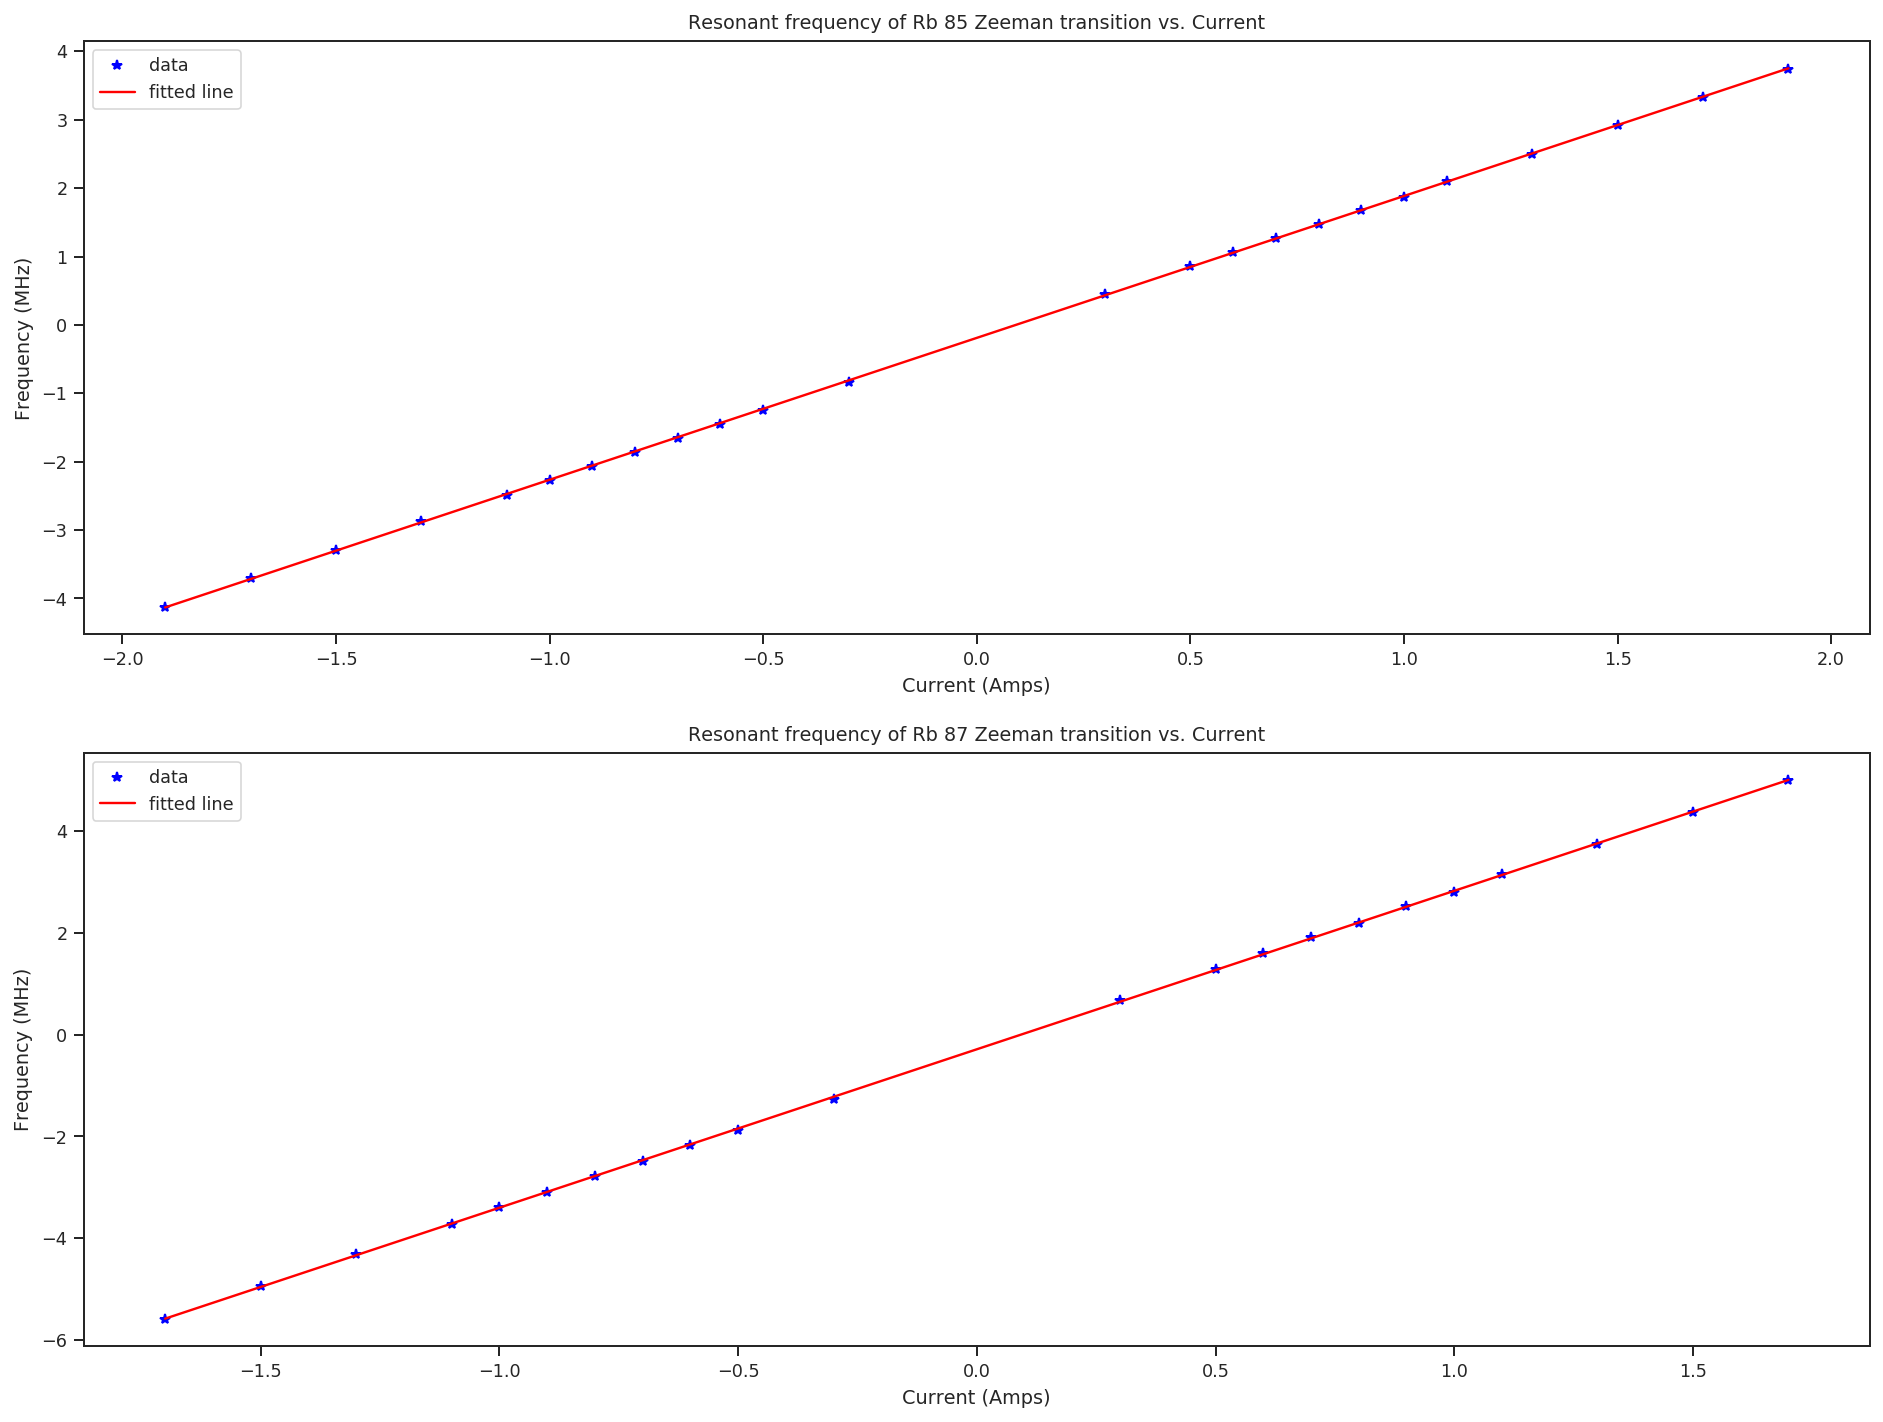

In [39]:
plt.subplots(2, 1, sharex=True, figsize=(16,12))

plt.subplot(211)
plot_fit(rb85_currents, rb85_freq, par85, "Rb 85")
plt.subplot(212)
plot_fit(rb87_currents, rb87_freq, par87, "Rb 87")

In [33]:
rb85_current_neg = rb85_currents[0:12]
rb85_current_pos = rb85_currents[12:]
rb85_freq_neg = rb85_freq[0:12]
rb85_freq_pos = rb85_freq[12:]

In [34]:
rb87_current_neg = rb87_currents[0:11]
rb87_current_pos = rb87_currents[11:]
rb87_freq_neg = rb87_freq[0:11]
rb87_freq_pos = rb87_freq[11:]

In [24]:
print("source: Rb 85 negative")
par85_neg, errors85_neg, uncertainty_y85_neg = fit_linear(rb85_current_neg, rb85_freq_neg)

print("source: Rb 85 positive")
par85_pos, errors85_pos, uncertainty_y85_pos = fit_linear(rb85_current_pos, rb85_freq_pos)


print("source: Rb 87 negative")
par87_neg, errors87_neg, uncertainty_y87_neg = fit_linear(rb87_current_neg, rb87_freq_neg)

print("source: Rb 87 positive")
par87_pos, errors87_pos, uncertainty_y87_pos = fit_linear(rb87_current_pos, rb87_freq_pos)

source: Rb 85 negative
x-intercept = -0.21+/- 0.00 (Amps)
slope =  2.05+/- 0.00 (MHz/Amps)
The best fit line is y =-0.21 +2.05x
Note: These uncertainties are from scipy estimation.
uncertainty of y =  0.00 (MHz)


source: Rb 85 positive
x-intercept = -0.17+/- 0.01 (Amps)
slope =  2.06+/- 0.00 (MHz/Amps)
The best fit line is y =-0.17 +2.06x
Note: These uncertainties are from scipy estimation.
uncertainty of y =  0.01 (MHz)


source: Rb 87 negative
x-intercept = -0.32+/- 0.01 (Amps)
slope =  3.08+/- 0.01 (MHz/Amps)
The best fit line is y =-0.32 +3.08x
Note: These uncertainties are from scipy estimation.
uncertainty of y =  0.01 (MHz)


source: Rb 87 positive
x-intercept = -0.25+/- 0.01 (Amps)
slope =  3.08+/- 0.01 (MHz/Amps)
The best fit line is y =-0.25 +3.08x
Note: These uncertainties are from scipy estimation.
uncertainty of y =  0.01 (MHz)




In [69]:
print(magnetic_field(0.21,"85"), magnetic_field(.17,"85"))
print(magnetic_field(0.32,"87"), magnetic_field(.25,"87"))

print(nuclear_spin(2.05), nuclear_spin(2.06))
print(nuclear_spin(3.08), nuclear_spin(3.08))

0.45016077170418006 0.3644158628081458
0.4573061807788496 0.35727045373347627
2.516217294900222 2.50157546337158
1.5075472255017708 1.5075472255017708


In [71]:
def spin_err(spin, m, merr):
    const = 135*0.0025191*0.5
    const2 = np.sqrt((0.001/0.275)**2 + (m/merr)**2)
    return const*const2*spin

def field_err(b, nu, nuerr, I):
    const = 2*I/2.799
    const2 = nuerr/nu
    return const*const2*b

In [72]:
print(spin_err(2.516217294900222,2.05,0.004 ))
print(spin_err(2.50157,2.06,0.006 ))
print(spin_err(1.50754722550177,3.08,0.001 ))
print(spin_err(1.5075472255017708,2.08,0.001 ))


0.0017656707542580755
0.0019817861037635678
0.0009358616124530649
0.000940265129054028


In [74]:
print(field_err(0.450160771, 0.21, 0.003, 2.5))
print(field_err(0.364415862, 0.17, 0.005, 2.5))
print(field_err(0.457306180778, 0.32, 0.009, 1.5))
print(field_err(0.357270453733, 0.25, 0.009, 1.5))

0.011487795922012966
0.019146326524178803
0.01378535512795418
0.013785355127961413


In [27]:
exp = np.array([model(val, *par85_neg) for val in rb85_currents[0:12]])
sig01 = np.repeat(0.01, len(rb85_freq[0:12]))
rb85_chi_sq_ = chi_sq(rb85_freq[0:12], exp, sig01)
print(rb85_chi_sq_)

exp = np.array([model(val, *par85_pos) for val in rb85_currents[12:]])
sig01 = np.repeat(0.01, len(rb85_freq[12:]))
rb85_chi_sq_ = chi_sq(rb85_freq[12:], exp, sig01)
print(rb85_chi_sq_)

exp = np.array([model(val, *par87_neg) for val in rb87_currents[0:11]])
sig01 = np.repeat(0.01, len(rb87_freq[0:11]))
rb85_chi_sq_ = chi_sq(rb87_freq[0:11], exp, sig01)
print(rb85_chi_sq_)

exp = np.array([model(val, *par87_pos) for val in rb87_currents[11:]])
sig01 = np.repeat(0.01, len(rb87_freq[11:]))
rb85_chi_sq_ = chi_sq(rb87_freq[11:], exp, sig01)
print(rb85_chi_sq_)

2.6284746815780773
6.514569742156079
14.253174212598413
14.204079724409304


In [56]:
frequency = rb85_freq_neg
current = rb85_current_neg
par = par85_neg

data_point_error = ( np.sum((frequency - model(current, *par))**2) / (current.size - par.size) )**(1/2)
print('Estimated uncertainty in measurement of y: {:.3f} MHz'.format(data_point_error))
sum_squares_x = np.sum(current**2)

print("Sum of residuals square: ", np.sum((frequency - model(current, *par))**2))

intercept_uncertainty = data_point_error * ( sum_squares_x / (current.size * sum_squares_x - np.sum(current)**2) )**(1/2)
slope_uncertainty = data_point_error * ( current.size / (current.size * sum_squares_x - np.sum(current)**2) )**(1/2)
print('unweighted fit:')
print('\tslope = ({:.2f} +- {:.1g}) MHz/Amp'.format(par[0], slope_uncertainty))
print('\tintercept = ({:.2f} +- {:.1g}) MHz'.format(par[1], intercept_uncertainty))

Estimated uncertainty in measurement of y: 0.005 MHz
Sum of residuals square:  0.0002628474681578077
unweighted fit:
	slope = (-0.21 +- 0.003) MHz/Amp
	intercept = (2.05 +- 0.004) MHz


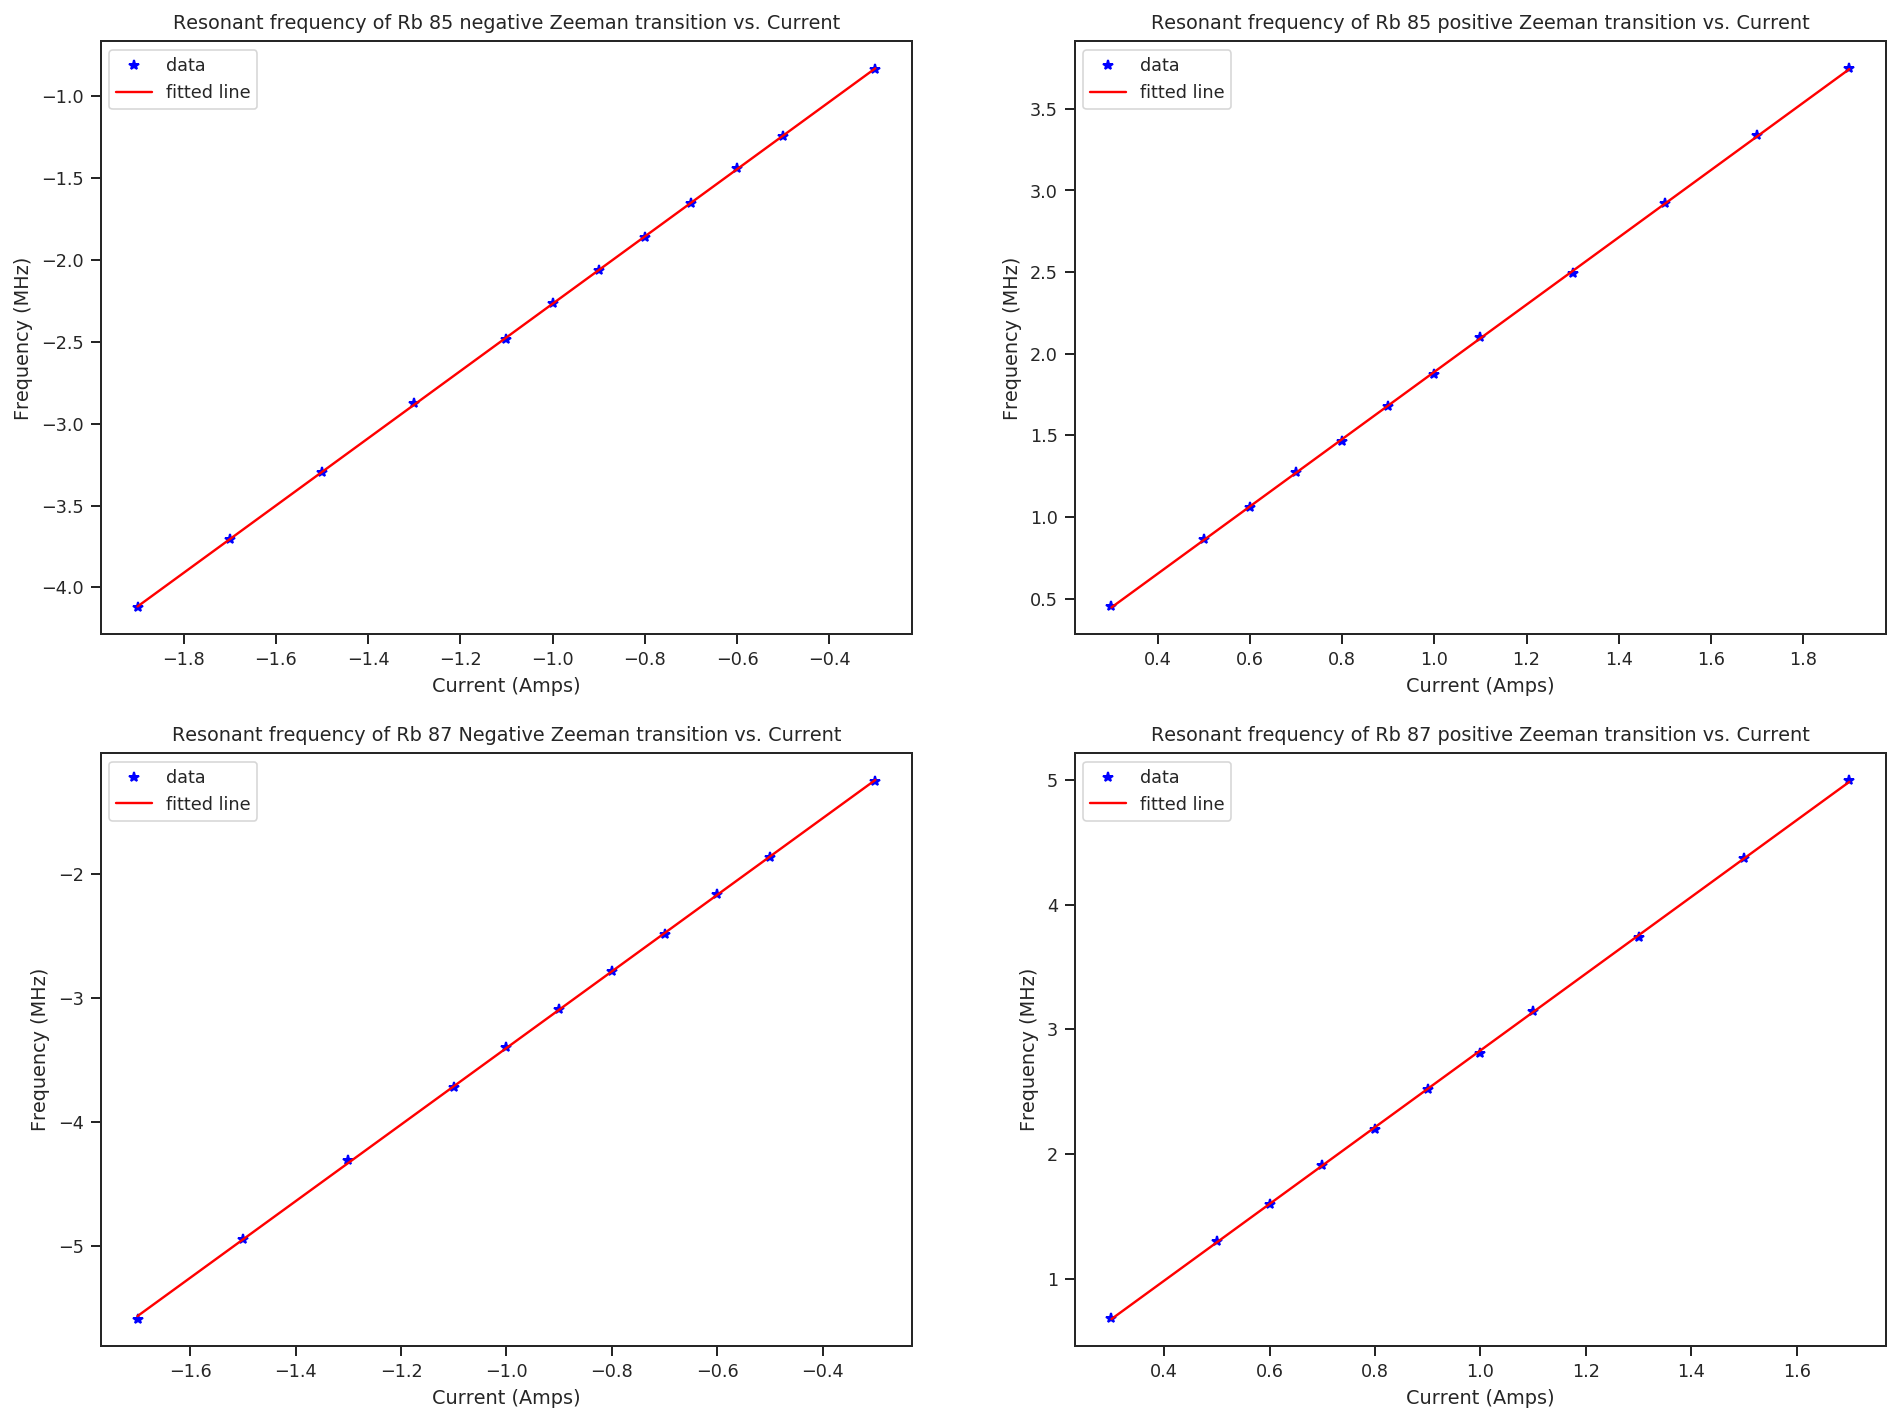

In [11]:
plt.subplots(2, 2, sharex=True, figsize=(16,12))

plt.subplot(221)
plot_fit(rb85_current_neg, rb85_freq_neg, par85_neg, "Rb 85 negative")
plt.subplot(222)
plot_fit(rb85_current_pos, rb85_freq_pos, par85_pos, "Rb 85 positive")
plt.subplot(223)
plot_fit(rb87_current_neg, rb87_freq_neg, par87_neg, "Rb 87 Negative")
plt.subplot(224)
plot_fit(rb87_current_pos, rb87_freq_pos, par87_pos, "Rb 87 positive")

In [65]:
def plot_res(x, y, par, source):
    #plt.figure(figsize=(8,6))
    title = "Residual vs Independent Variable (Current, Amps) " + source
    res = y-model(x,*par)
    plt.scatter(x, res, c='red')
    plt.plot(x,res)
    #plt.plot(x, model(x, *par), '-r', label = 'fitted line')
    #plt.legend()
    plt.xlabel('Independent Variable: Current (Amps)')
    plt.ylabel('Residual (MHz)')
    plt.title(title)

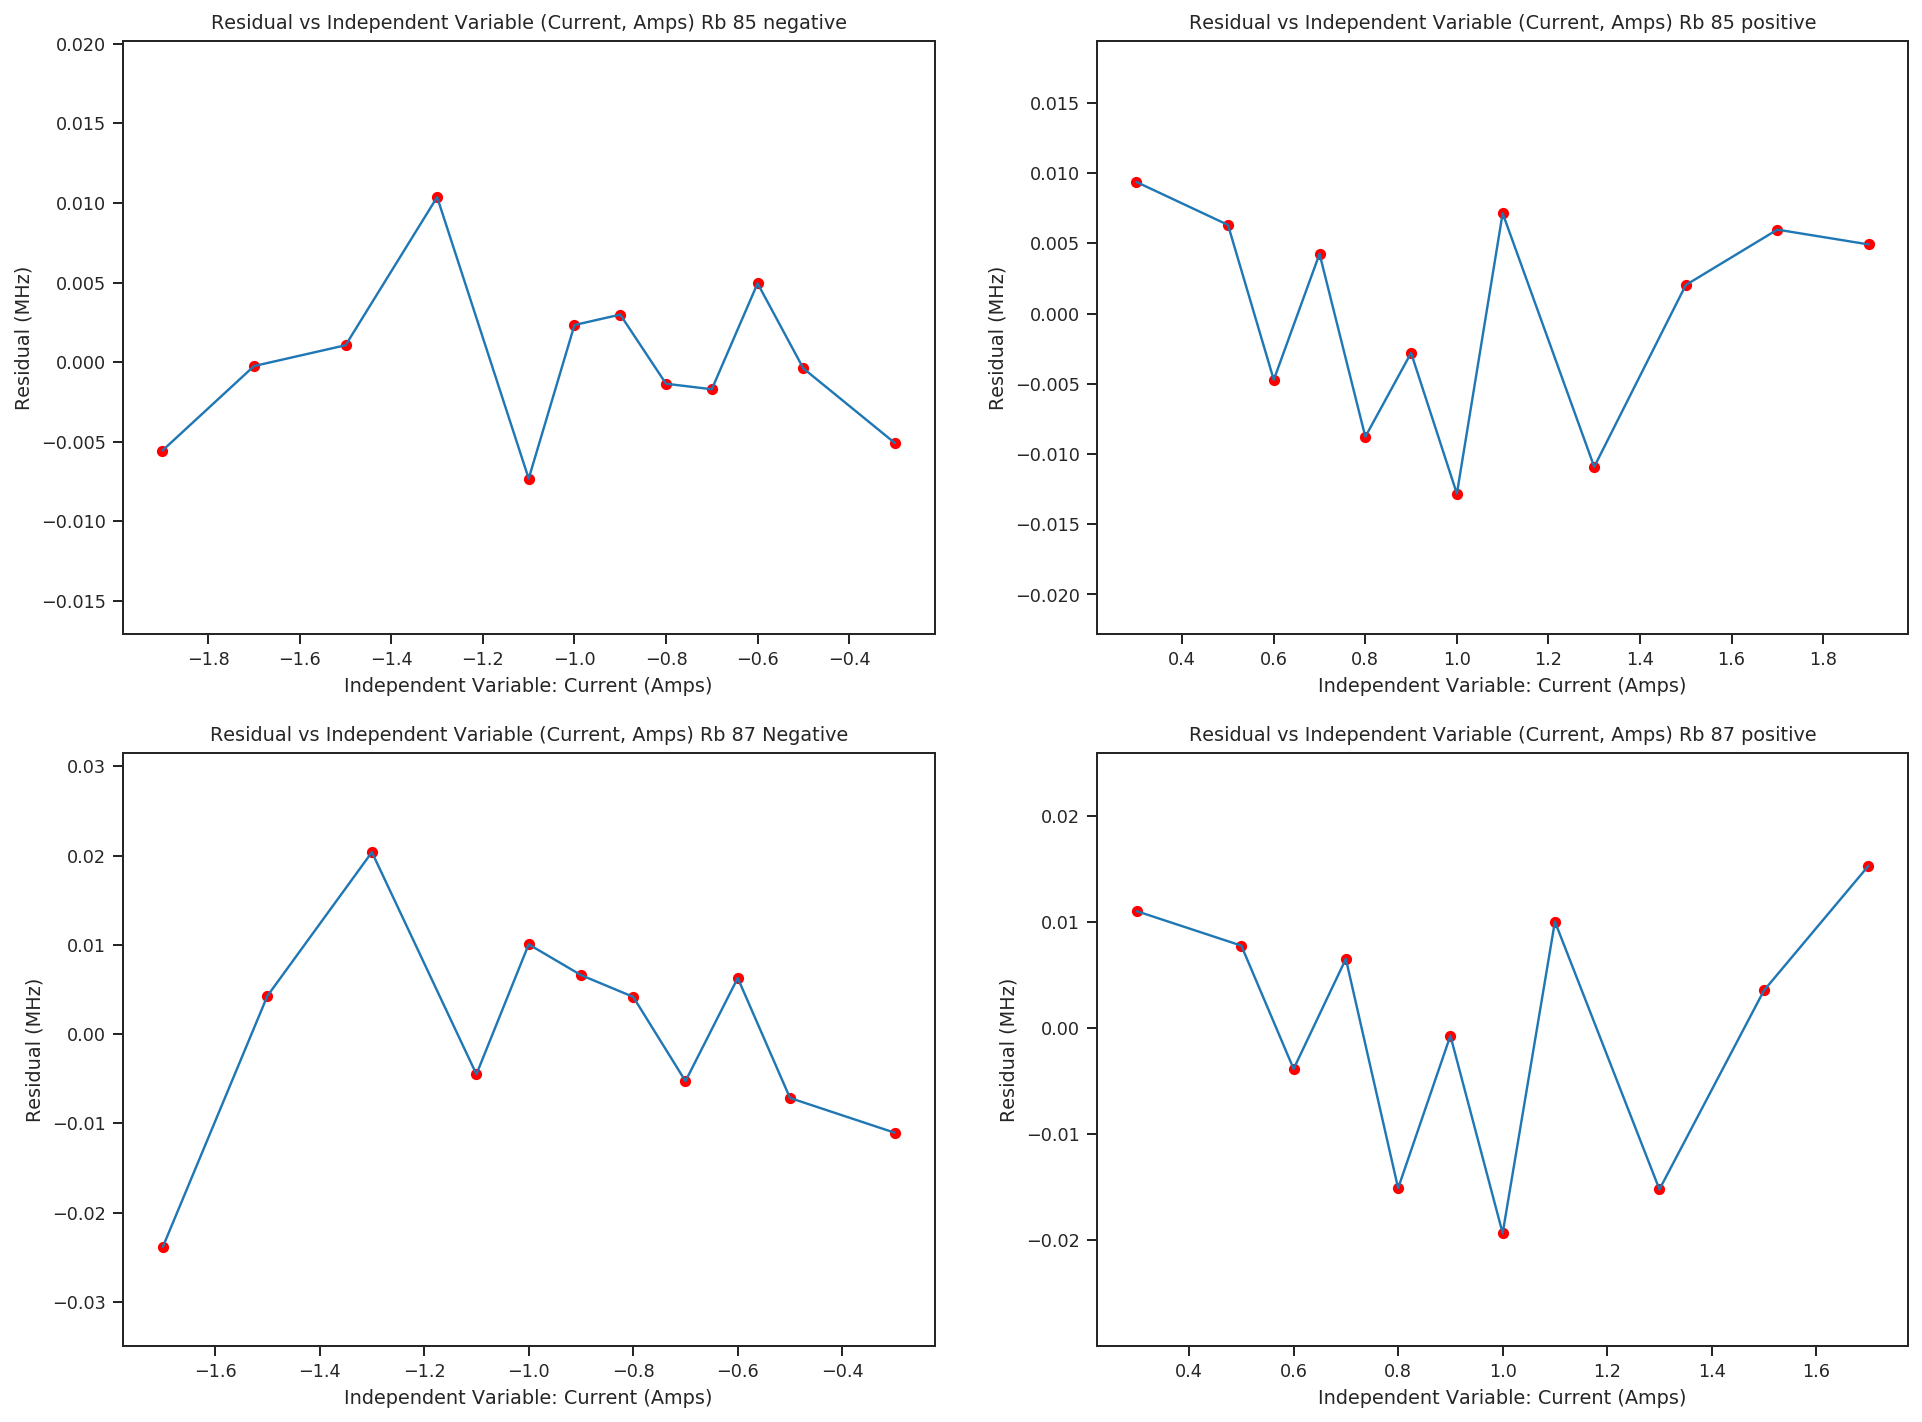

In [66]:
plt.subplots(2, 2, sharex=True, figsize=(16,12))

plt.subplot(221)
plot_res(rb85_current_neg, rb85_freq_neg, par85_neg, "Rb 85 negative")
plt.subplot(222)
plot_res(rb85_current_pos, rb85_freq_pos, par85_pos, "Rb 85 positive")
plt.subplot(223)
plot_res(rb87_current_neg, rb87_freq_neg, par87_neg, "Rb 87 Negative")
plt.subplot(224)
plot_res(rb87_current_pos, rb87_freq_pos, par87_pos, "Rb 87 positive")

In [12]:
def magnetic_field(b, source):
    if source == "85":
        I = 5/2
        return b*(2*I+1)/2.799
    else:
        I = 3/2
        return b*(2*I+1)/2.799

# angle of device, 39 deg 
b_field = magnetic_field(par87_pos[0], '87')
print(b_field/np.sin(-2*np.pi/9))

0.5466672911774224
